In [75]:
# Increase the cell size to avoid scrolling with graphs. Use javascript. 

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# UFO Sightings

The data set has been taken from kaggle datasets which can be found in the following location:

"https://www.kaggle.com/hakeemtfrank/ufo-sightings-data-exploration"

The dataset contained severl columns and over 80,000 rows. Due to the numerous errors in the dataset, it was reduced by half to work on the following exercise. 

The following presents a few simple analyses of the data comprising: 
- the tred of UFO sightings over time;
- the geographical distribution of UFO sightings; and
- the common shapes observed

## Import UFO data set

In [76]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import re


In [77]:
df = pd.read_csv('complete_2.csv')

In [78]:
# Check data frame typ
type(df)

pandas.core.frame.DataFrame

In [79]:
df.head()

,day,month,year,date,time,city,state,country,shape,duration (seconds),latitude,longitude
0,10,10,1949,10/10/1949,20:30:00,san marcos,tx,us,cylinder,2700.0,29.883056,-97.941111
1,10,10,1949,10/10/1949,21:00:00,lackland afb,tx,us,light,7200.0,29.384210,-98.581082
2,10,10,1955,10/10/1955,17:00:00,chester (uk),NaN,gb,circle,20.0,53.200000,-2.916667
3,10,10,1956,10/10/1956,21:00:00,edna,tx,us,circle,20.0,28.978333,-96.645833
4,10,10,1960,10/10/1960,20:00:00,kaneohe,hi,us,light,900.0,21.418056,-157.803611


In [80]:
# Check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35570 entries, 0 to 35569
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 35570 non-null  int64  
 1   month               35570 non-null  int64  
 2   year                35570 non-null  int64  
 3   date                35570 non-null  object 
 4   time                35570 non-null  object 
 5   city                35570 non-null  object 
 6   state               32775 non-null  object 
 7   country             31794 non-null  object 
 8   shape               35570 non-null  object 
 9   duration (seconds)  35570 non-null  float64
 10  latitude            35570 non-null  float64
 11  longitude           35570 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.3+ MB


## Check sightings by year

In [81]:
# Check for NaN and null

df['year'].isna().value_counts()

False    35570
Name: year, dtype: int64

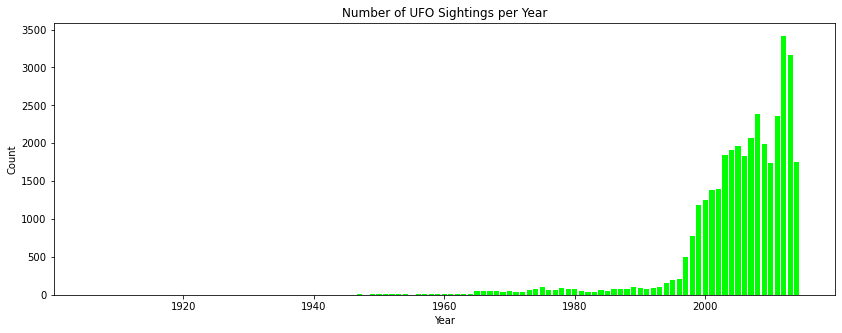

In [82]:
# create df for the year

year = df['year'].value_counts()

# Plot bar graph of the sightings by year and predict next decade

fig, ax = plt.subplots(figsize=(14, 5))

ax.bar(x = year.index, height = year, color = '#00FF00')
ax.set_xlabel('Year');
ax.set_ylabel('Count')
ax.set_title('Number of UFO Sightings per Year');


- The graph suggests that UFOs and extraterestrial beings have become more fascinated with our world over the last two decades.  Perhaps this is attributed to their desire to understand the complexities of the 21st century, much like many of us...

## UFO sightings by country

In [83]:
# Check for NaN and null

df['country'].isna().value_counts()

False    31794
True      3776
Name: country, dtype: int64

In [84]:
# change city column to string

df['city'] = df['city'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35570 entries, 0 to 35569
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 35570 non-null  int64  
 1   month               35570 non-null  int64  
 2   year                35570 non-null  int64  
 3   date                35570 non-null  object 
 4   time                35570 non-null  object 
 5   city                35570 non-null  object 
 6   state               32775 non-null  object 
 7   country             31794 non-null  object 
 8   shape               35570 non-null  object 
 9   duration (seconds)  35570 non-null  float64
 10  latitude            35570 non-null  float64
 11  longitude           35570 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.3+ MB


In [85]:
# get the country from city column - anything between brackets is a country

df['city_country'] = df['city'].str.extract('.*\((.*)\).*')


In [86]:
# extraction leads to mixed types, nan are floats and countries are strings. Check.

type(df['city_country'][0])

float

In [87]:
type(df['city_country'][2])

str

In [88]:
# Make sure column is a string

df['city_country'] = df['city_country'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35570 entries, 0 to 35569
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 35570 non-null  int64  
 1   month               35570 non-null  int64  
 2   year                35570 non-null  int64  
 3   date                35570 non-null  object 
 4   time                35570 non-null  object 
 5   city                35570 non-null  object 
 6   state               32775 non-null  object 
 7   country             31794 non-null  object 
 8   shape               35570 non-null  object 
 9   duration (seconds)  35570 non-null  float64
 10  latitude            35570 non-null  float64
 11  longitude           35570 non-null  float64
 12  city_country        35570 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [89]:
# Check the different countries from the city_country column

df['city_country'].unique()

array(['nan', 'uk', 'canada', 'new zealand', 'russia', 'australia',
       'italy', 'norway', 'denmark', 'iceland', 'puerto rico', 'austria',
       'japan', 'peru', 'turkey', 'belgium', 'china', 'greece',
       'malaysia', 'armenia', 'france', 'kendall', 'republic of ireland',
       'india', 'thailand', 'hungary', 'germany', 'spain', 'philippines',
       'venezuela', 'pakistan', 'iran', 'afghanistan', 'morocco',
       'taiwan', 'israel', 'egypt', 'poland', 'south africa',
       'costa rica', 'south korea', 'honduras', 'lithuania', 'sweden',
       'netherlands', 'mexico', 'dominican republic', 'macedonia',
       'argentina', 'jamaica', 'switzerland', 'bangladesh',
       'czech republic', 'northern ireland', 'cyprus', 'greenland',
       'belize', 'kuwait', 'romania', 'ukraine', 'bulgaria', 'slovakia',
       'algeria', 'trinidad', 'iraq', 'finland', 'lebanon', 'sri lanka',
       'bosnia', 'latvia', 'croatia', 'uzbekistan', 'ghana', 'brazil',
       'vietnam', 'nepal', 'bolivia

In [90]:
# Infill nan with city_country column

df.loc[df['country'].isnull(),'country'] = df['city_country']

df.tail()

,day,month,year,date,time,city,state,country,shape,duration (seconds),latitude,longitude,city_country
35565,4,21,2014,4/21/2014,21:45:00,port of spain (trinidad),NaN,trinidad,unknown,2400.0,10.666667,-61.516667,trinidad
35566,4,21,2014,4/21/2014,22:00:00,north atlanta,ga,us,light,15.0,33.865000,-84.336667,nan
35567,4,21,2014,4/21/2014,22:15:00,quezon city (philippines),NaN,philippines,light,3.0,14.676041,121.043700,philippines
35568,4,21,2014,4/21/2014,22:20:00,ozark,mo,us,triangle,120.0,37.020833,-93.205833,nan
35569,4,21,2014,4/21/2014,23:00:00,chesterfield,va,us,unknown,1800.0,37.376944,-77.506111,nan


In [91]:
# Check all values from 'country' and change names

df['country'].unique()

array(['us', 'gb', 'be', 'ca', 'nz', 'ru', 'au', 'it', 'no', 'de', 'ic',
       'ja', 'pe', 'vi', 'tu', 'ch', 'hk', 'gr', 'nan', 'malaysia',
       'armenia', 'france', 'republic of ireland', 'india', 'canada',
       'thailand', 'hungary', 'japan', 'new zealand', 'spain',
       'philippines', 'uk', 'greece', 'venezuela', 'pakistan', 'iran',
       'afghanistan', 'morocco', 'taiwan', 'australia', 'china', 'norway',
       'israel', 'egypt', 'puerto rico', 'pol', 'south africa', 'belgium',
       'iceland', 'costa rica', 'south korea', 'honduras', 'lithuania',
       'sweden', 'italy', 'netherlands', 'mexico', 'dominican republic',
       'macedonia', 'argentina', 'denmark', 'jamaica', 'switzerland',
       'bangladesh', 'czech republic', 'northern ireland', 'cyprus',
       'peru', 'greenland', 'belize', 'kuwait', 'romania', 'ukraine',
       'bulgaria', 'slovakia', 'algeria', 'trinidad', 'iraq', 'finland',
       'russia', 'lebanon', 'sri lanka', 'germany', 'bosnia', 'latvia',
      

In [92]:
# Change acronyms to country

df.loc[df['country'] == 'us', 'country'] = 'USA'
df.loc[df['country'] == 'gb', 'country'] = 'UK'
df.loc[df['country'] == 'ca', 'country'] = 'canada'
df.loc[df['country'] == 'nz', 'country'] = 'new zealand'
df.loc[df['country'] == 'ru', 'country'] = 'russia'
df.loc[df['country'] == 'au', 'country'] = 'australia'
df.loc[df['country'] == 'it', 'country'] = 'italy'
df.loc[df['country'] == 'li', 'country'] = 'lithuania'
df.loc[df['country'] == 'no', 'country'] = 'norway'
df.loc[df['country'] == 'de', 'country'] = 'denmark'
df.loc[df['country'] == 'ic', 'country'] = 'iceland'
df.loc[df['country'] == 'me', 'country'] = 'mexico'
df.loc[df['country'] == 'ja', 'country'] = 'japan'
df.loc[df['country'] == 'pe', 'country'] = 'peru'
df.loc[df['country'] == 'vi', 'country'] = 'vietnam'
df.loc[df['country'] == 'tu', 'country'] = 'turkey'
df.loc[df['country'] == 'ch', 'country'] = 'china'
df.loc[df['country'] == 'hk', 'country'] = 'hong kong'
df.loc[df['country'] == 'gr', 'country'] = 'greece'
df.loc[df['country'] == 'sp', 'country'] = 'spain'
df.loc[df['country'] == 'uae', 'country'] = 'uae'
df.loc[df['country'] == 'fr', 'country'] = 'france'
df.loc[df['country'] == 'ar', 'country'] = 'argentina'
df.loc[df['country'] == 'in', 'country'] = 'india'
df.loc[df['country'] == 'sa', 'country'] = 'south africa'
df.loc[df['country'] == 'se', 'country'] = 'serbia'
df.loc[df['country'] == 'pu', 'country'] = 'puerto rico'
df.loc[df['country'] == 'ir', 'country'] = 'republic of ireland'
df.loc[df['country'] == 'po', 'country'] = 'portugal'
df.loc[df['country'] == 'pol', 'country'] = 'poland'
df.loc[df['country'] == 'ne', 'country'] = 'netherlands'
df.loc[df['country'] == 'tr', 'country'] = 'trinidad'
df.loc[df['country'] == 'ne', 'country'] = 'netherlands'
df.loc[df['country'] == 'is', 'country'] = 'israel'
df.loc[df['country'] == 'th', 'country'] = 'thailand'
df.loc[df['country'] == 'ma', 'country'] = 'malaysia'
df.loc[df['country'] == 'sk', 'country'] = 'south korea'
df.loc[df['country'] == 'ho', 'country'] = 'honduras'
df.loc[df['country'] == 'roi', 'country'] = 'republic of ireland'
df.loc[df['country'] == 'na', 'country'] = 'namibia'
df.loc[df['country'] == 'ku', 'country'] = 'kuwait'
df.loc[df['country'] == 'br', 'country'] = 'brazil'
df.loc[df['country'] == 'be', 'country'] = 'belgium'
df.loc[df['country'] == 'Nan', 'country'] = 'unknown'

In [93]:
# capitalise each word

df['country'] = df['country'].str.capitalize()

# Check changes 

df['country'].unique()

array(['Usa', 'Uk', 'Belgium', 'Canada', 'New zealand', 'Russia',
       'Australia', 'Italy', 'Norway', 'Denmark', 'Iceland', 'Japan',
       'Peru', 'Vietnam', 'Turkey', 'China', 'Hong kong', 'Greece', 'Nan',
       'Malaysia', 'Armenia', 'France', 'Republic of ireland', 'India',
       'Thailand', 'Hungary', 'Spain', 'Philippines', 'Venezuela',
       'Pakistan', 'Iran', 'Afghanistan', 'Morocco', 'Taiwan', 'Israel',
       'Egypt', 'Puerto rico', 'Poland', 'South africa', 'Costa rica',
       'South korea', 'Honduras', 'Lithuania', 'Sweden', 'Netherlands',
       'Mexico', 'Dominican republic', 'Macedonia', 'Argentina',
       'Jamaica', 'Switzerland', 'Bangladesh', 'Czech republic',
       'Northern ireland', 'Cyprus', 'Greenland', 'Belize', 'Kuwait',
       'Romania', 'Ukraine', 'Bulgaria', 'Slovakia', 'Algeria',
       'Trinidad', 'Iraq', 'Finland', 'Lebanon', 'Sri lanka', 'Germany',
       'Bosnia', 'Latvia', 'Croatia', 'Uzbekistan', 'Ghana', 'Brazil',
       'Austria', 'Nepal',

In [94]:
# create df for the 10 countries with the highest UFO sightings - there are too many countries to display them all. 

country = df['country'].value_counts().nlargest(10)

country

Usa                    29551
Nan                     2147
Canada                  1254
Uk                       972
Australia                271
India                    127
Mexico                   123
South africa              86
New zealand               75
Republic of ireland       58
Name: country, dtype: int64

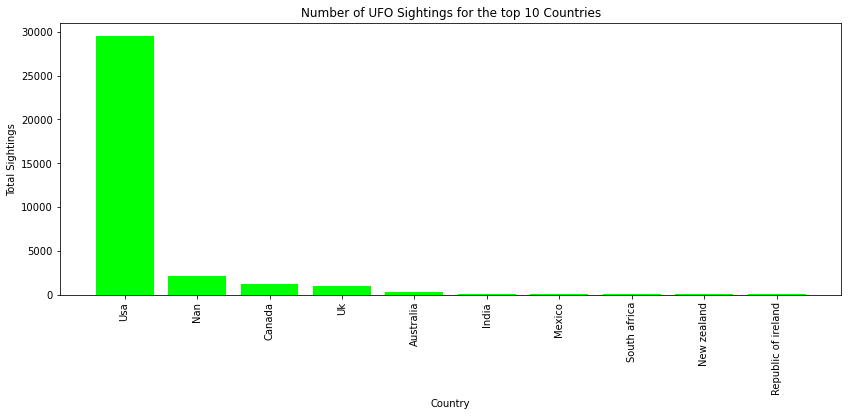

In [95]:
# Plot bar graph of the sightings by top 10 coutries
fig, ax = plt.subplots(figsize=(14, 5))

ax.bar(x = country.index, height = country, color = '#00FF00')
plt.xticks(rotation='vertical')
ax.set_xlabel('Country');
ax.set_ylabel('Total Sightings')
ax.set_title('Number of UFO Sightings for the top 10 Countries');


- This graph suggests that extraterrestrial UFOs find the USA the most interesting country in the whole world, one worth repeatedly visiting for observation. Perhaps given the increased frequency of visits in recent years, they to were trying to understand the reasons for electing the Trump administration...

### UFO Sightings across the USA

In [96]:
# check for nan

df['latitude'].isnull().sum()

0

In [97]:
# check for 0

(df['latitude']== 0).sum()

482

In [98]:
# Remove longitude and latitude without co-ordinates

df = df[df['latitude'] != 0]

# Check 

(df['latitude']== 0).sum()

0

In [99]:
location = df[df['country'] == 'Usa']

location['country'].unique()

array(['Usa'], dtype=object)

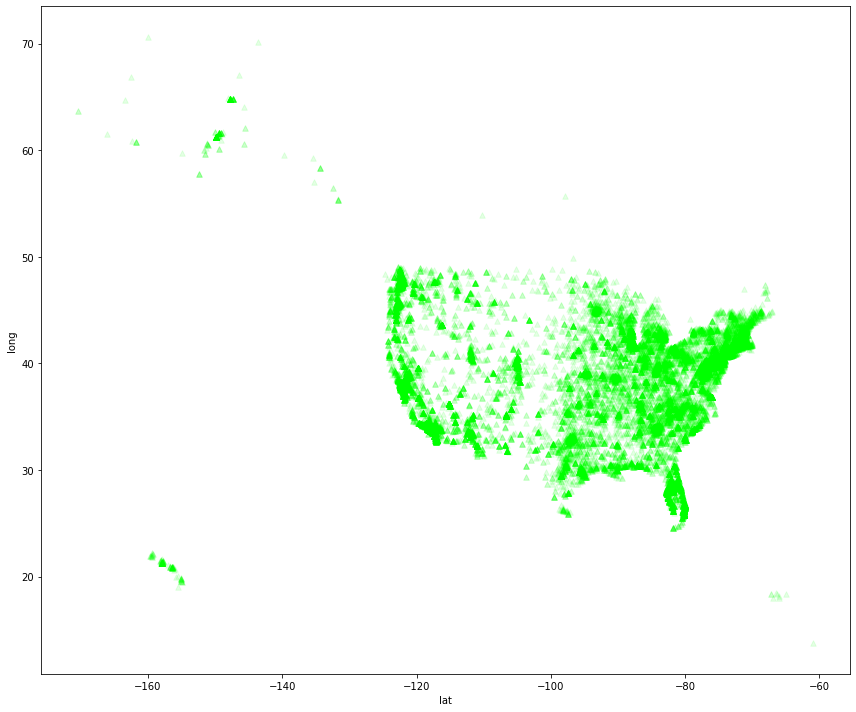

In [114]:
# Plot the locations of the UFOs

fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(x=location['longitude'], y=location['latitude'],
            c = '#00FF00',
            alpha = 0.1,
            s = 30,
            marker = '^')

ax.set_xlabel('lat')
ax.set_ylabel('long')

plt.tight_layout()

- It appears the UFOs are not clustered in any single location, and the spreasd of the sightings are similar to the population density in the USA.  

## Most common UFO shape seen in the USA

In [87]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', 'delta', 'changing', 'egg', 'flash',
       'diamond', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome'], dtype=object)

In [ ]:
# Plot bar graph of the sightings by year and predict next decade

fig, axs = plt.subplots(figsize=(12, 4)) 

axs.df['shape'].plot()